## Лабораторная работа № 14. Кластеризация.
### (Валяев Георгий, ПИ20-6)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import plotly.express as px

### Задания для выполнения

##### 1. Загрузите прилагающийся датасет.
##### 2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [3]:
dataframe = pd.read_csv('data/Mall_Customers.csv',names=['ID','Genre',"Age",'Income','Score'], skiprows=[0])
dataframe

,ID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataframe.isna().sum()

ID        0
Genre     0
Age       0
Income    0
Score     0
dtype: int64

##### 3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<AxesSubplot: xlabel='Income', ylabel='Score'>

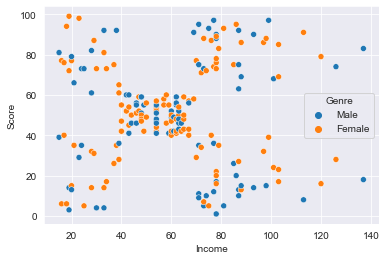

In [6]:
sns.scatterplot(x='Income', y = 'Score', data=dataframe, hue='Genre')

###### Корреляции между полом и тратами/поступлениями не выявлено

##### 4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

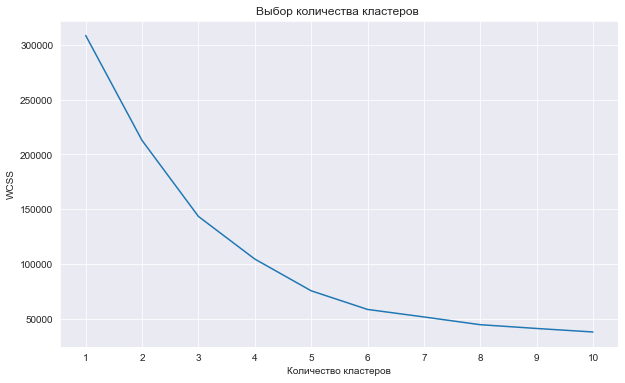

In [9]:
X = dataframe[['Age', 'Income' , 'Score']]

# Переберем возможное количество кластеров
wcss = []
for i in range(1, 11):
	k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=12)
	k_means.fit(X)
	wcss.append(k_means.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Выбор количества кластеров ')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

##### 5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [27]:
first_df = X.iloc[:, [1, 2]]
first_df

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [28]:
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state = 0)
predicted = kmeans.fit_predict(first_df)
predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
assert predicted.shape[0] == first_df.shape[0]

In [31]:
fig = px.scatter_3d(X, x='Age',y='Income',z='Score',color=predicted)
fig.show()

##### 6. Построить графическую интерпретацию из пункта 3,  с центрами кластеров.

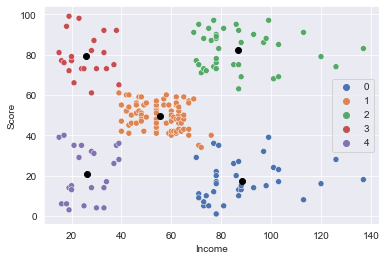

In [33]:
f, ax = plt.subplots()
sns.scatterplot(x=first_df['Income'], y=first_df['Score'], hue=predicted, palette="deep", data=first_df, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.show()

##### Из приведенного выше графика видно, что клиентов можно разделить на 5 кластеров и использовать их данные в целях маркетинга

###### 0 = Средние покупатели со средним доходом (Можно использовать больше рекламы, чтобы стимулировать постоянное взаимодействие)
###### 1 = Клиенты с высокими расходами и низким доходом (Можно использовать больше рекламы)
###### 2 = Клиенты с высоким доходом и высокими расходами (Можно использовать более эксклюзивные и VIP-предложения)
###### 3 = Клиенты с низким доходом и низкими расходами (Можно использовать больше рекламных предложений и больших скидок)
###### 4 = Клиенты с высоким доходом и низкими расходами (Можно использовать VIP-предложения по кредитным картам)

##### 7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

In [34]:
second_df = X.iloc[:, [0, 2]]
second_df

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



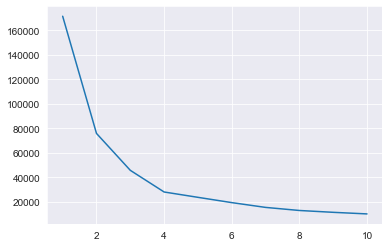

In [35]:
values_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(second_df)
    values_list.append(kmeans.inertia_)
plt.plot(range(1, 11), values_list)
plt.show()

##### Оптимальное кол-во кластеров - 4
###### Получаем сами кластеры с помощью k-средних

In [37]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=0)
predicted = kmeans2.fit_predict(second_df)
predicted

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [38]:
assert predicted.shape[0] == second_df.shape[0]

In [40]:
items_list = zip(predicted, second_df["Age"].to_list(), second_df["Score"].to_list())
for predict, income, score in items_list:
    print(f"Класс: {predict}, age: {income}, score: {score}")

Класс: 2, age: 19, score: 39
Класс: 1, age: 21, score: 81
Класс: 0, age: 20, score: 6
Класс: 1, age: 23, score: 77
Класс: 2, age: 31, score: 40
Класс: 1, age: 22, score: 76
Класс: 0, age: 35, score: 6
Класс: 1, age: 23, score: 94
Класс: 0, age: 64, score: 3
Класс: 1, age: 30, score: 72
Класс: 0, age: 67, score: 14
Класс: 1, age: 35, score: 99
Класс: 0, age: 58, score: 15
Класс: 1, age: 24, score: 77
Класс: 0, age: 37, score: 13
Класс: 1, age: 22, score: 79
Класс: 2, age: 35, score: 35
Класс: 2, age: 20, score: 66
Класс: 0, age: 52, score: 29
Класс: 1, age: 35, score: 98
Класс: 2, age: 35, score: 35
Класс: 1, age: 25, score: 73
Класс: 0, age: 46, score: 5
Класс: 1, age: 31, score: 73
Класс: 0, age: 54, score: 14
Класс: 1, age: 29, score: 82
Класс: 0, age: 45, score: 32
Класс: 2, age: 35, score: 61
Класс: 0, age: 40, score: 31
Класс: 1, age: 23, score: 87
Класс: 0, age: 60, score: 4
Класс: 1, age: 21, score: 73
Класс: 0, age: 53, score: 4
Класс: 1, age: 18, score: 92
Класс: 0, age: 49, s

###### Визуализируем кластеры по возрасту и тратам

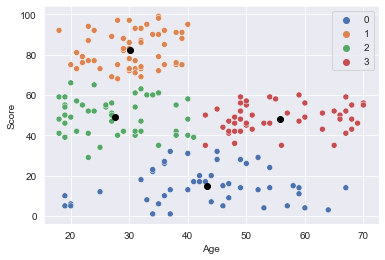

In [42]:
f, ax = plt.subplots()
sns.scatterplot(x=second_df['Age'], y=second_df['Score'], hue=predicted, palette="deep", data=second_df, ax=ax)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black')
plt.show()

##### Из приведенного выше графика видно, что в ранних возрастных группах больше кластеров по сравнению со старшими возрастными группами т.к. с возрастом расходы уменьшаются

##### 8. Оцените модель с помощью метрик.

###### silhouette_score: Измеряет расстояние разделения между кластерами, ближе к 1 - хороший результат

In [45]:
print(silhouette_score(second_df, predicted))

0.49973941540141753


###### calinski_harabasz_score, также известен как критерий соотношения дисперсий. Этот показатель определяется как отношение между внутрикластерной дисперсией и межкластерной дисперсией.

In [46]:
print(calinski_harabasz_score(second_df, predicted))

332.5631268443306


##### 9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [47]:
iter_list = list(range(2,25))
silhouette_list = []
calinski_harabasz_list = []

for n_clusters in iter_list:
    kmeans2 = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    predicted = kmeans2.fit_predict(second_df)
    centers = kmeans2.cluster_centers_
    score1 = silhouette_score(second_df, predicted)
    score2 = calinski_harabasz_score(second_df, predicted)

    silhouette_list.append(score1)
    calinski_harabasz_list.append(score2)
    print(f"Кол-во: {n_clusters}, silhouette = {round(score1,5)}, calinski_harabasz = {round(score2,5)})")

Кол-во: 2, silhouette = 0.46923, calinski_harabasz = 249.19429)
Кол-во: 3, silhouette = 0.453, calinski_harabasz = 270.08633)
Кол-во: 4, silhouette = 0.49974, calinski_harabasz = 332.56313)
Кол-во: 5, silhouette = 0.44527, calinski_harabasz = 302.43944)
Кол-во: 6, silhouette = 0.44055, calinski_harabasz = 302.46952)
Кол-во: 7, silhouette = 0.40833, calinski_harabasz = 321.55914)
Кол-во: 8, silhouette = 0.42903, calinski_harabasz = 332.19775)
Кол-во: 9, silhouette = 0.41199, calinski_harabasz = 329.64461)
Кол-во: 10, silhouette = 0.40531, calinski_harabasz = 331.06297)
Кол-во: 11, silhouette = 0.39096, calinski_harabasz = 318.32893)
Кол-во: 12, silhouette = 0.3794, calinski_harabasz = 317.62803)
Кол-во: 13, silhouette = 0.40573, calinski_harabasz = 319.52722)
Кол-во: 14, silhouette = 0.3975, calinski_harabasz = 322.98135)
Кол-во: 15, silhouette = 0.42495, calinski_harabasz = 330.3641)
Кол-во: 16, silhouette = 0.41172, calinski_harabasz = 334.48142)
Кол-во: 17, silhouette = 0.39578, cali

In [49]:
silhouette_list = np.array(silhouette_list)
calinski_harabasz_list = np.array(calinski_harabasz_list)

silhouette_list = (silhouette_list - silhouette_list.min()) / (silhouette_list.max() - silhouette_list.min())
calinski_harabasz_list = (calinski_harabasz_list - calinski_harabasz_list.min()) / (calinski_harabasz_list.max() - calinski_harabasz_list.min())

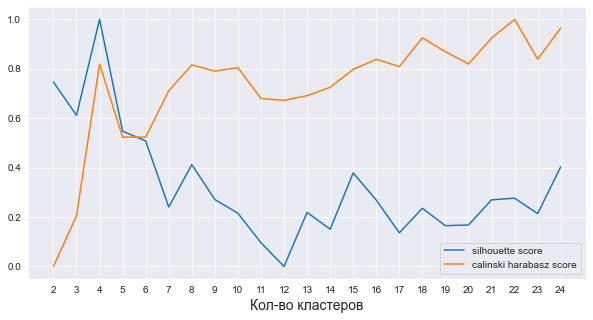

In [50]:
x = iter_list
y = silhouette_list
z = calinski_harabasz_list

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='silhouette score')
plt.plot(x, z, label='calinski harabasz score')

plt.xlabel('Кол-во кластеров', fontsize=14)

plt.xticks(x)
plt.legend()
plt.show()

##### Как видим из графика, наиболее привлекательные метрики возникают при количестве кластеров 4, что еще раз подтверждает правильность определения количества кластеров мной